# Mobile Price Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

В качестве первого датасета я выбрал датасет "Mobile Price Classification", в нем есть следующие параметры:
1. battery_power: Объем батареи в мАч.
2. blue: Наличие bluetooth
3. clock_speed: Скорость, с которой микропроцессор выполняет инструкции
4. dual_sim: Имеет поддержку двойной sim или нет
5. fc: Мега пикселей во фронтальной камере
6. four_g: Наличие 4G
7. int_memory: Внутренняя память в гигабайтах
8. m_dep: Глубина устройства в см
9. mobile_wt: Вес телефона
10. n_cores: Количество ядер процессора
11. pc: Мега пикселей в основной камере
12. px_height: Пикселей в экране в высоту
13. px_width: Пикселей в экране в ширину
14. ram: Размер оперативной памяти
15. sc_h: Высота экрана телефона в сантиметрах
16. sc_w: Ширина экрана мобильного телефона в сантиметрах
17. talk_time: Наибольшее время, в течение которого один раз заряд батареи будет длиться
18. three_g: Наличие 3G
19. touch_screen: Имеет сенсорный экран или нет
20. wifi: наличие WiFi

А цены делятся на 4 категории (от 0 до 3) 0 -- самые дешевые устройства, 3 -- самые дорогие.

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Информация о датасете

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

В датасете нет пропусков.

In [5]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


По средним значениям "булевых" признаков видно, что аппараты распределены примерно поровну для всех вариантов, кроме three_g (3G), по которому больше 2/3 устройств имеют эту функцию. Так же среднее значение price_range = 1.5, что является необходимым условием того, что в датасете все 4 категории представлены одинаковым колличеством телефонов

Посмотрим цифры по категоримя

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105a4f610>,
      dtype=object)

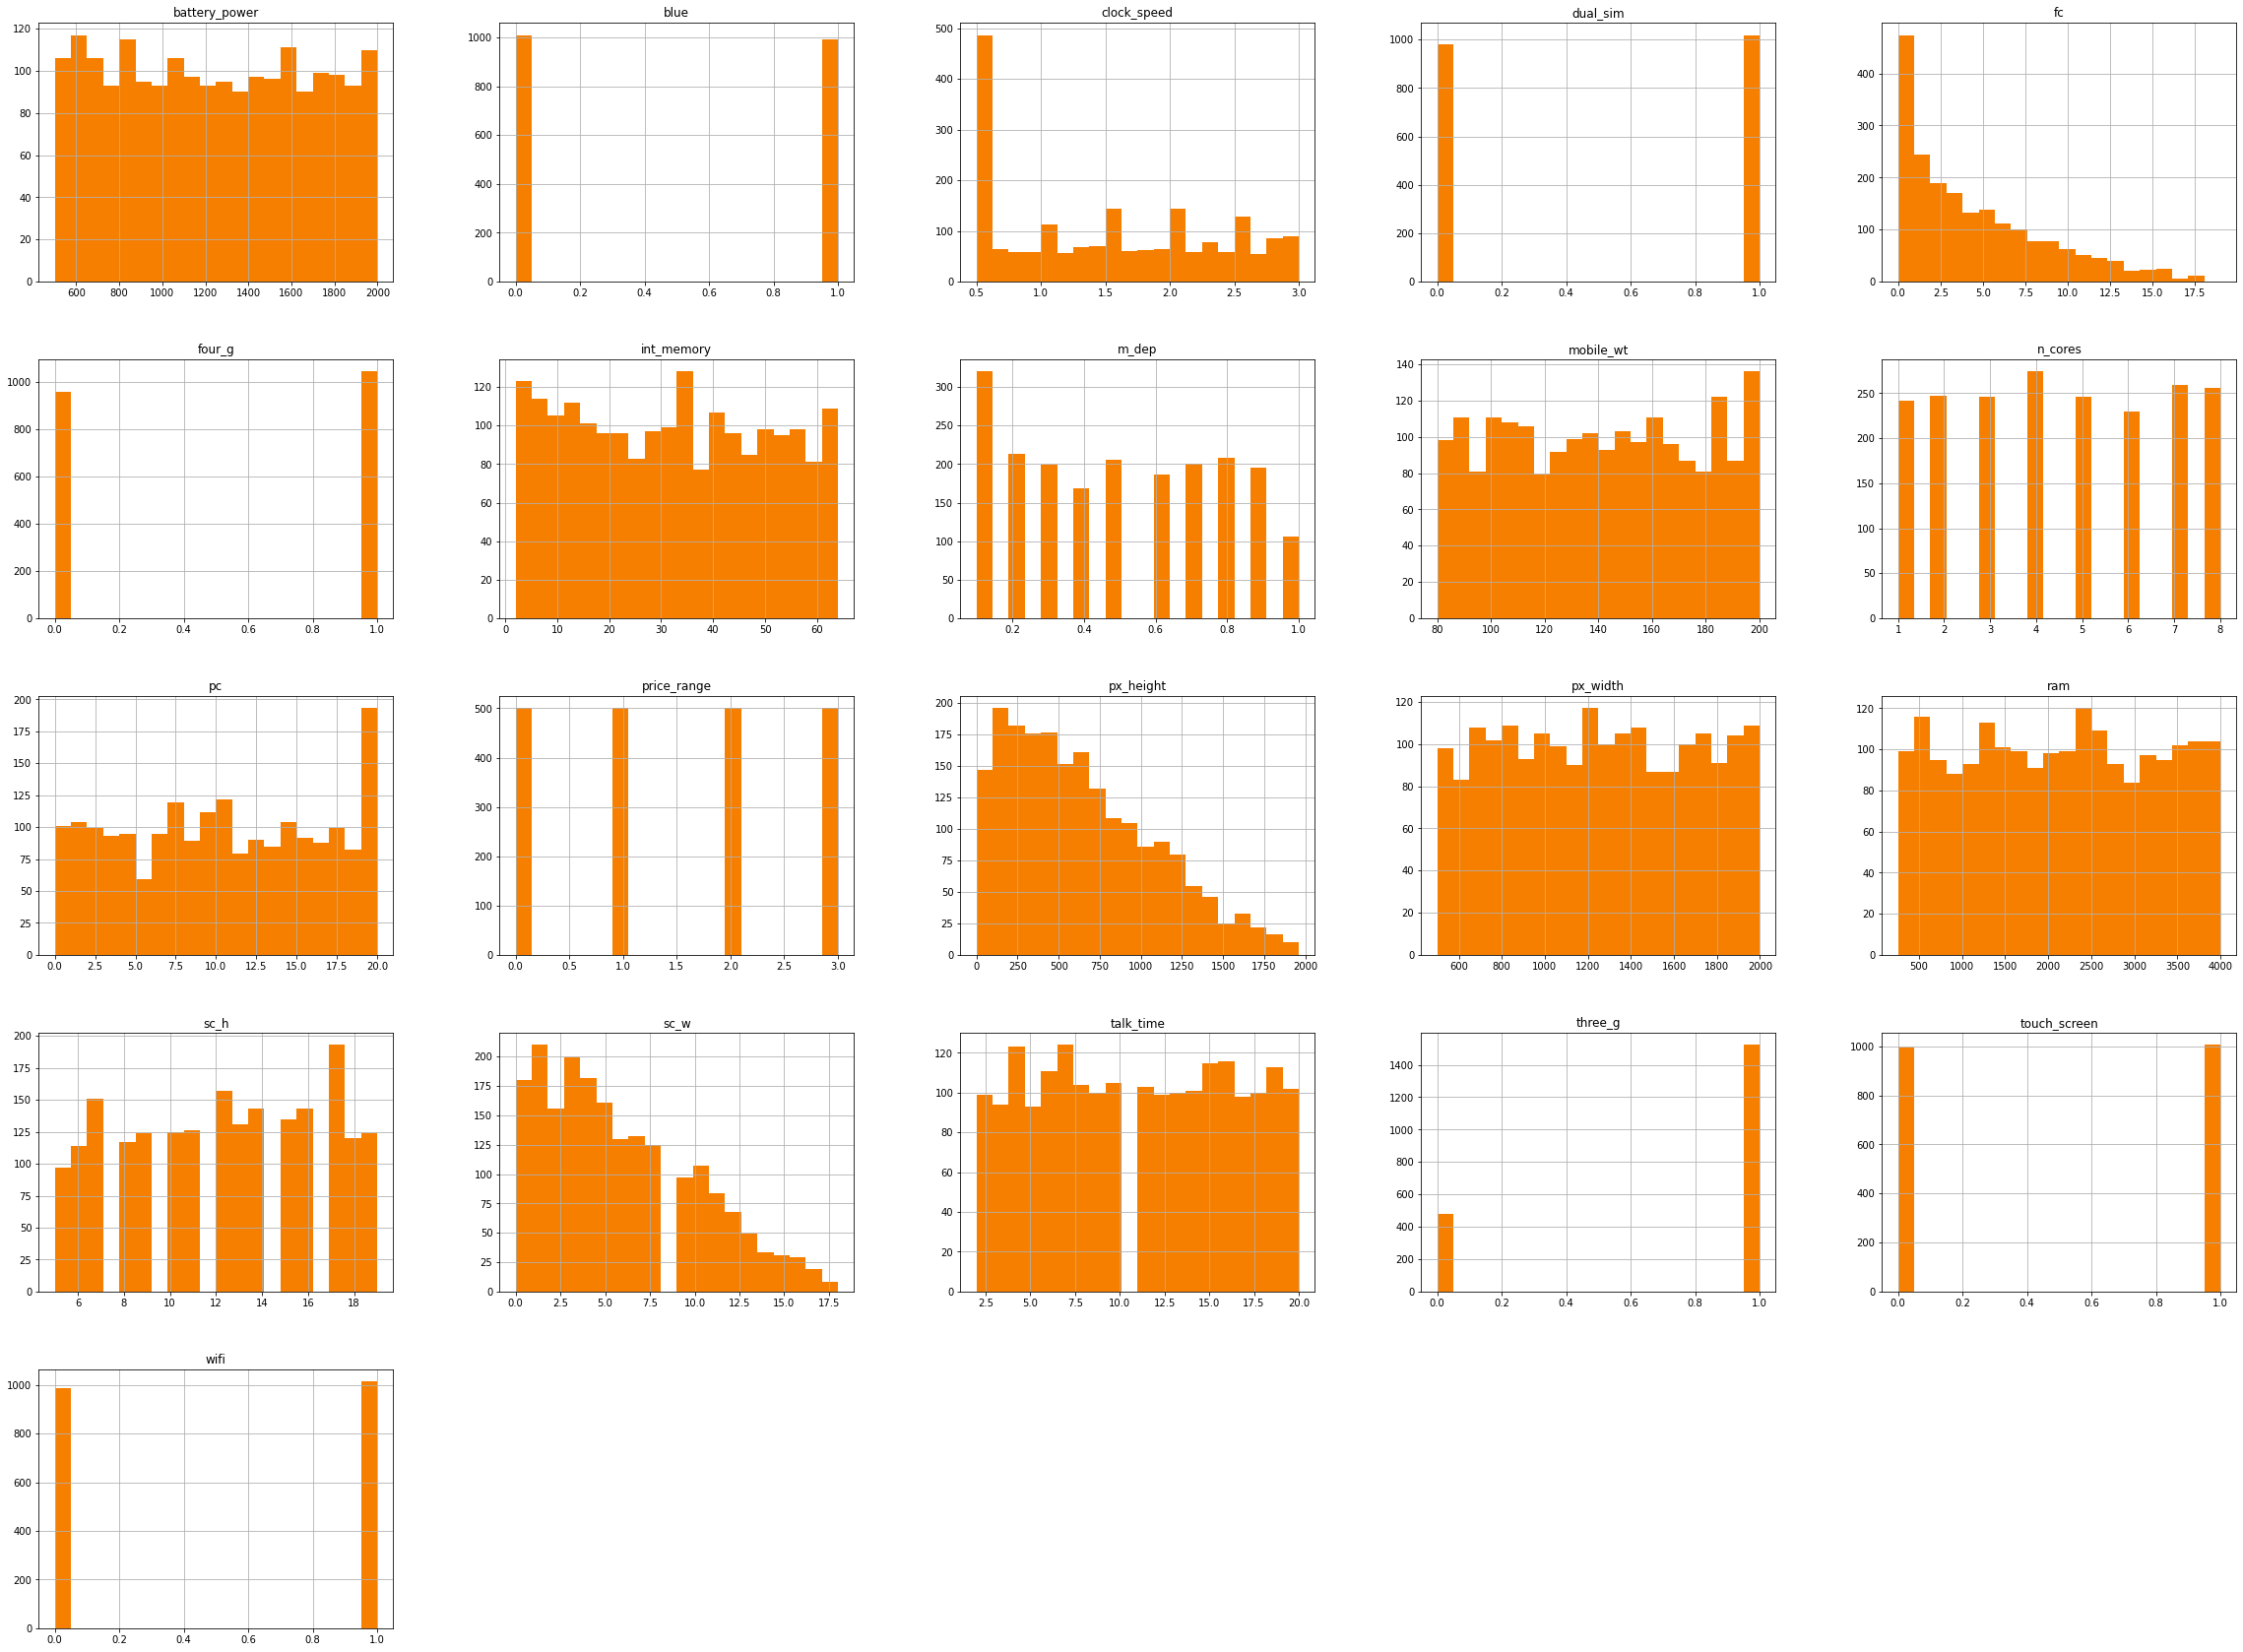

In [6]:
dataset.hist(bins=20, figsize=(40,30), color="#f77f00")

## Визуальный анализ

### Смотрим, насколько каждый признак сильно влияет на цену

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too

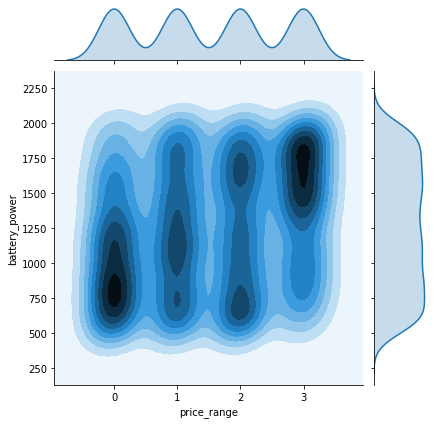

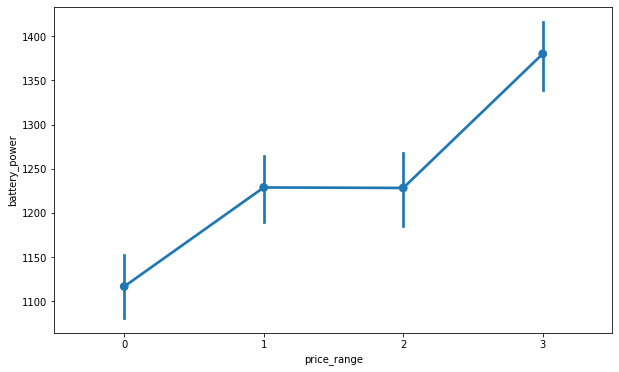

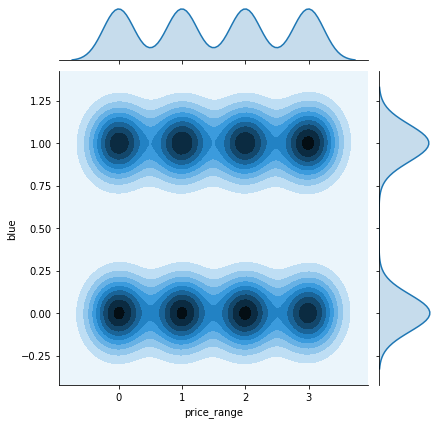

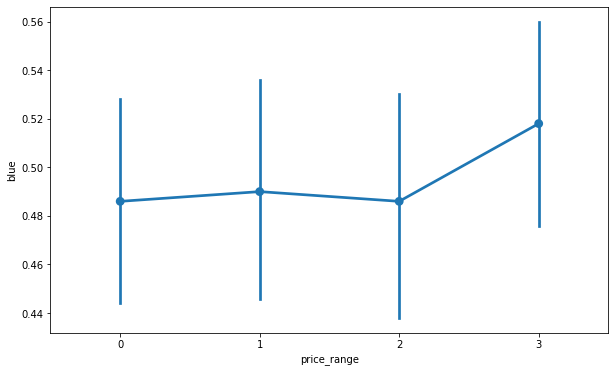

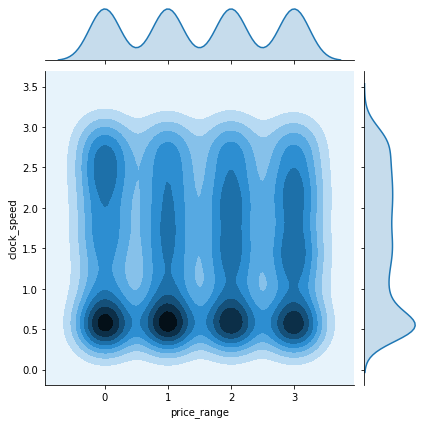

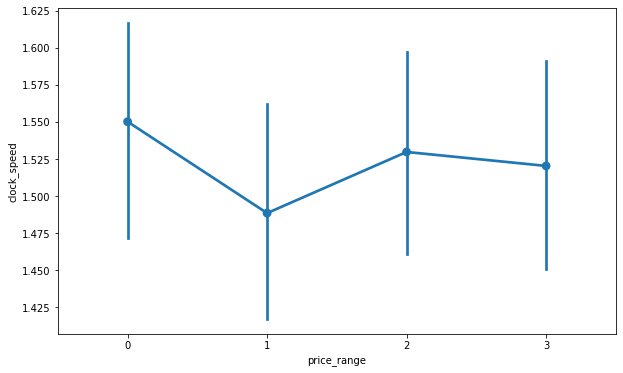

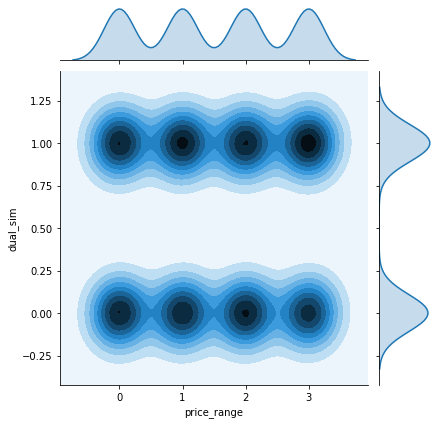

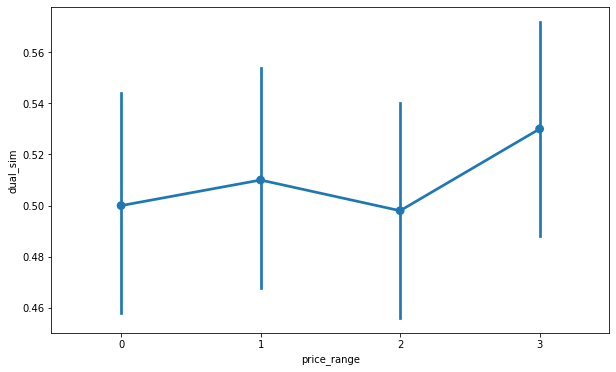

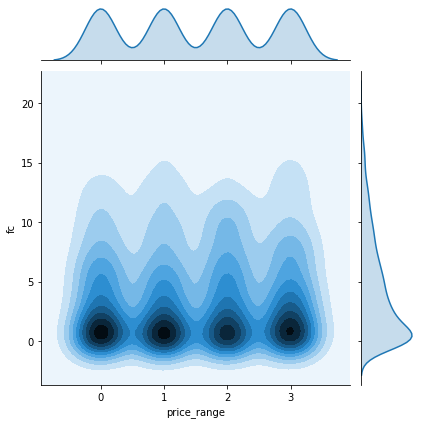

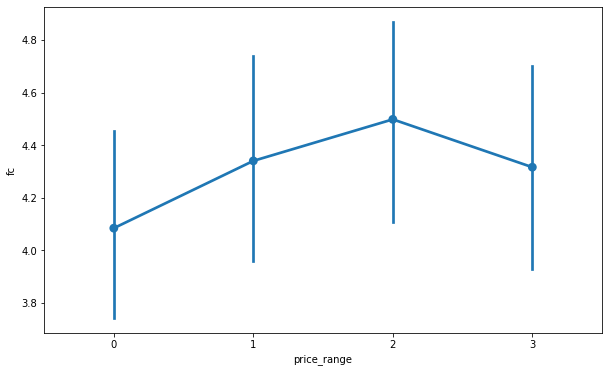

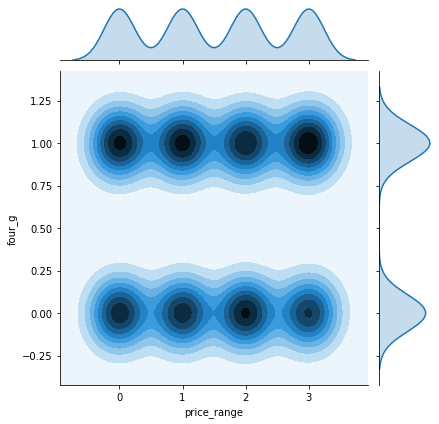

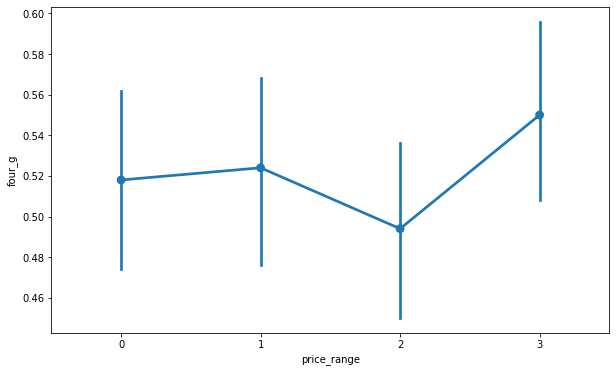

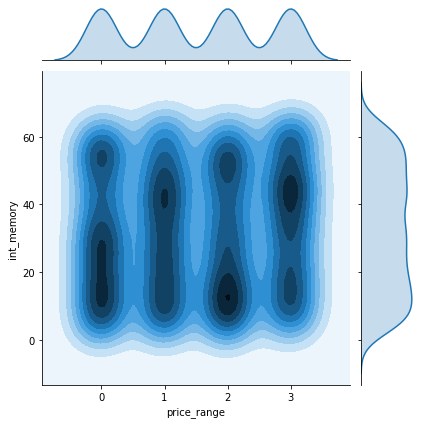

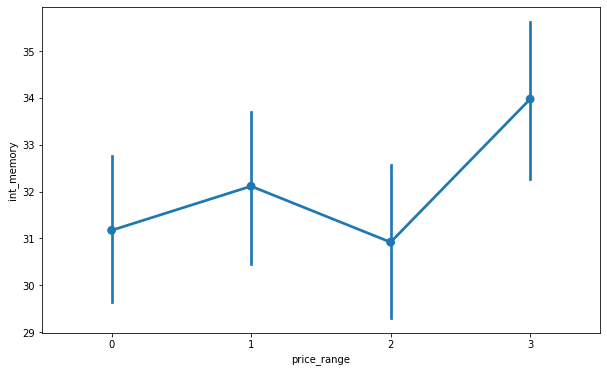

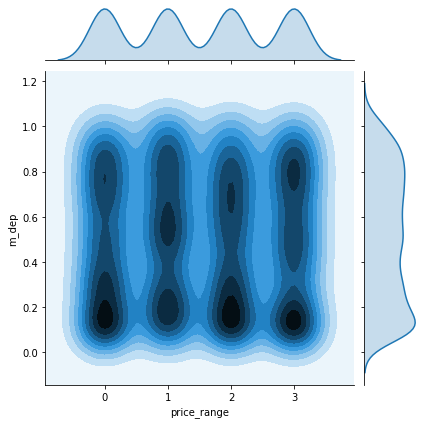

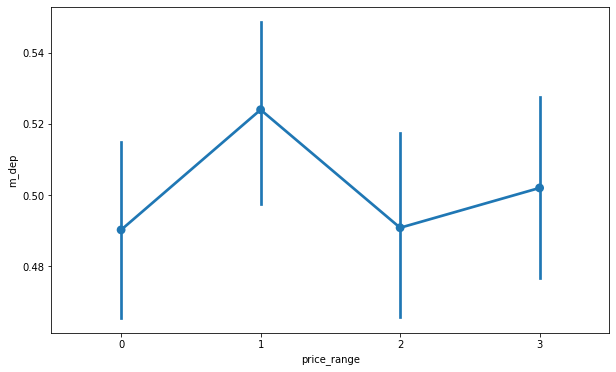

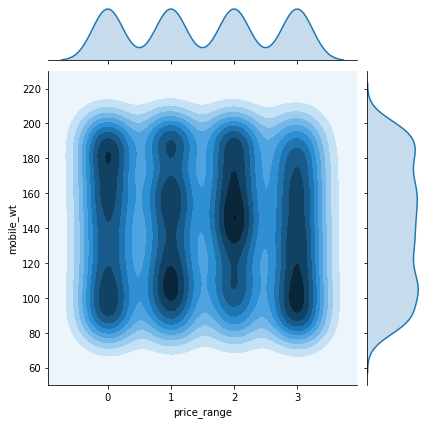

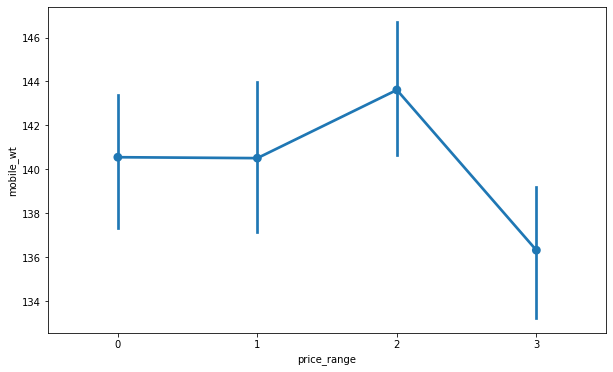

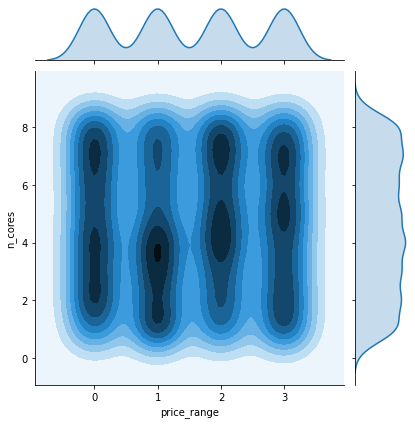

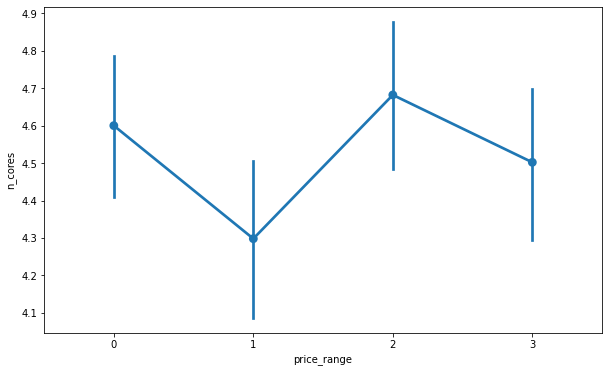

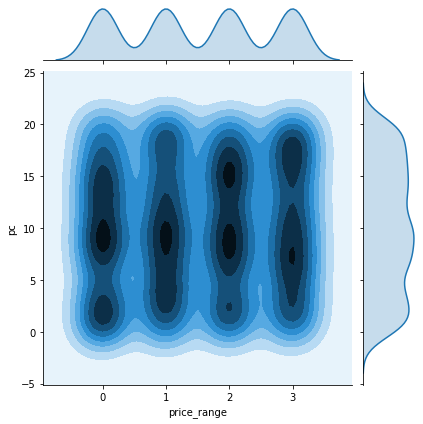

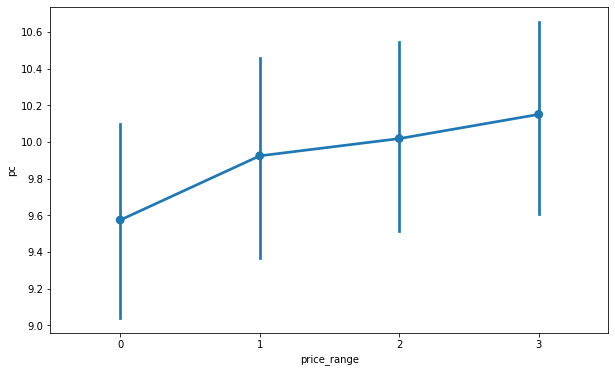

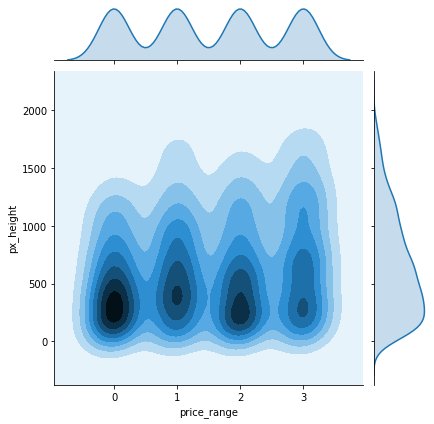

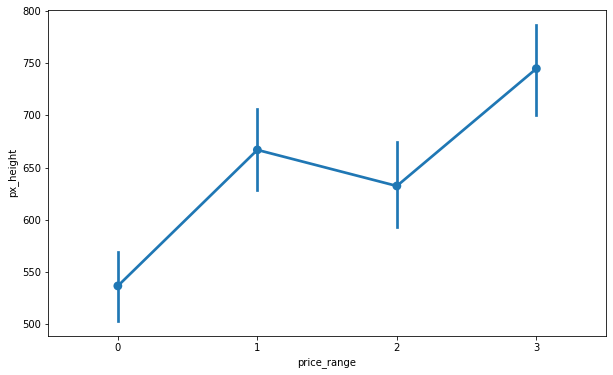

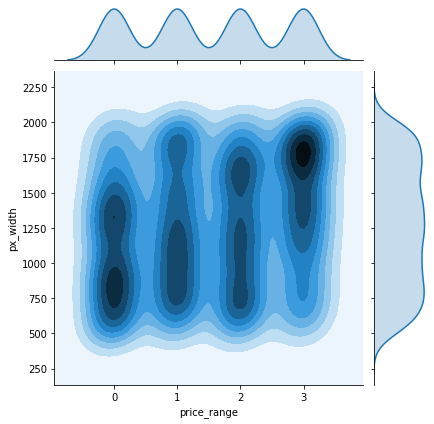

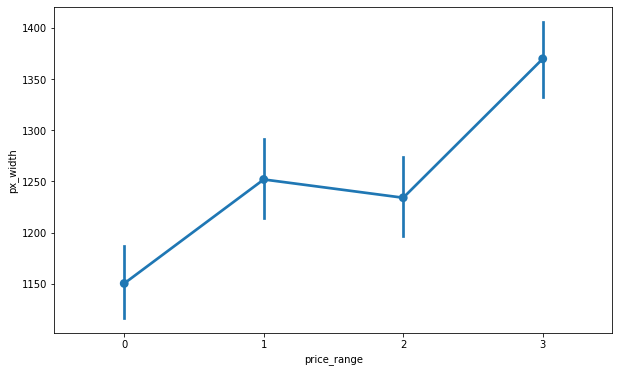

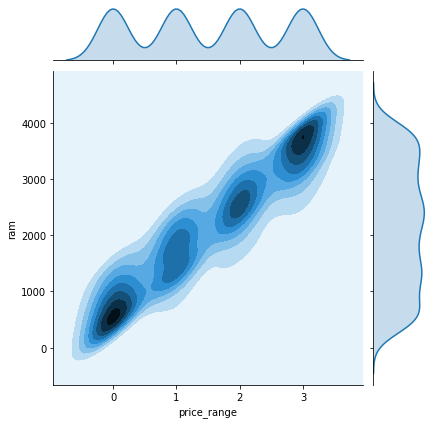

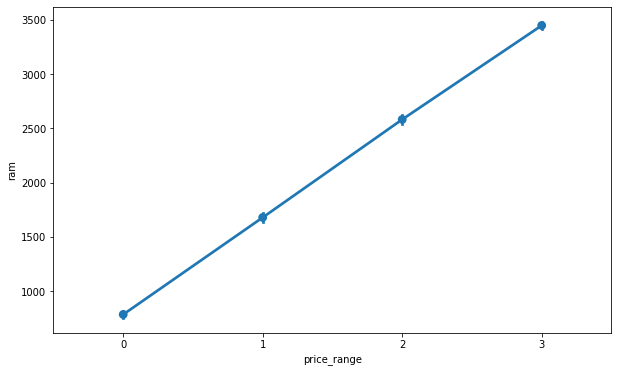

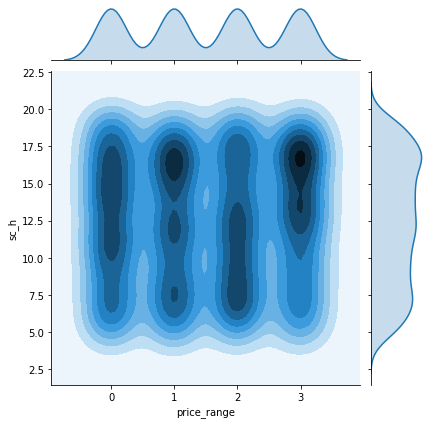

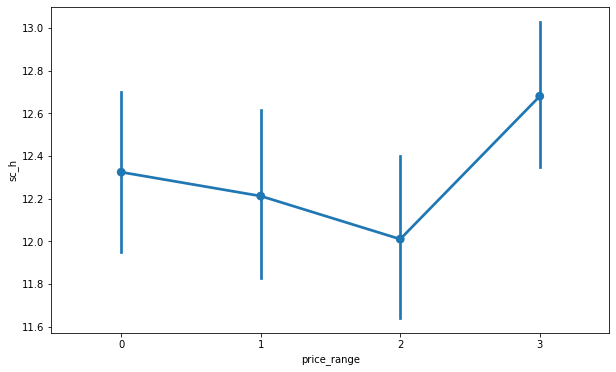

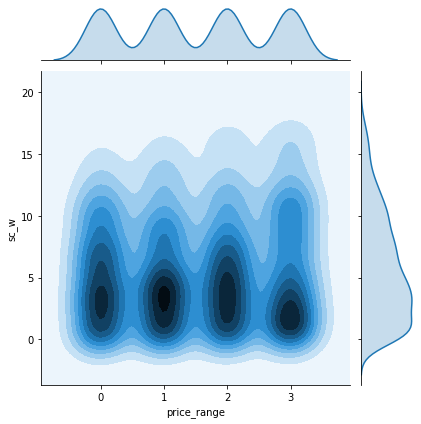

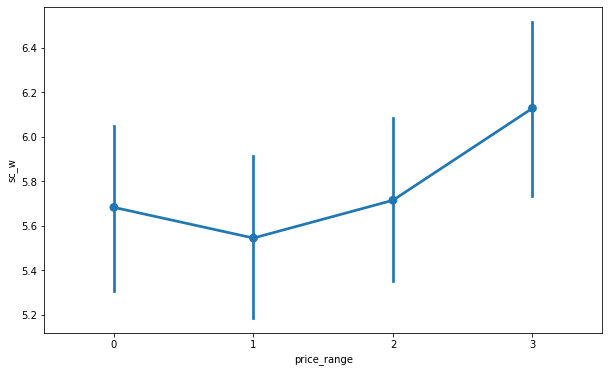

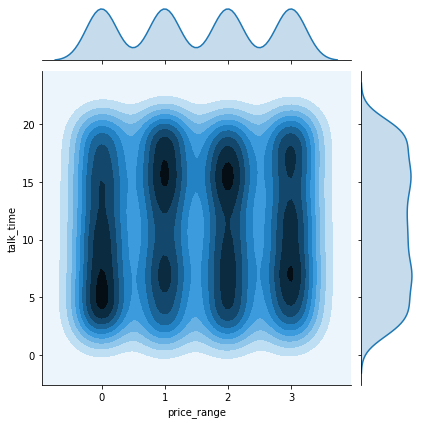

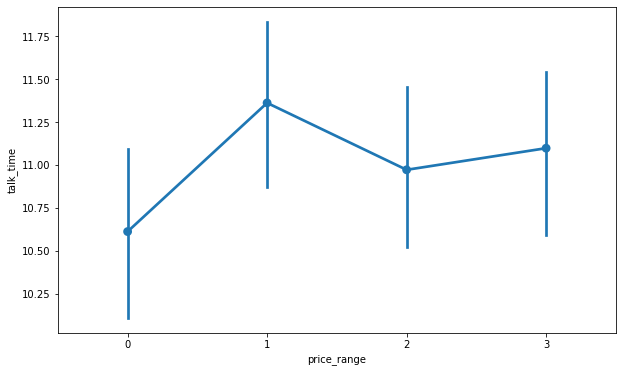

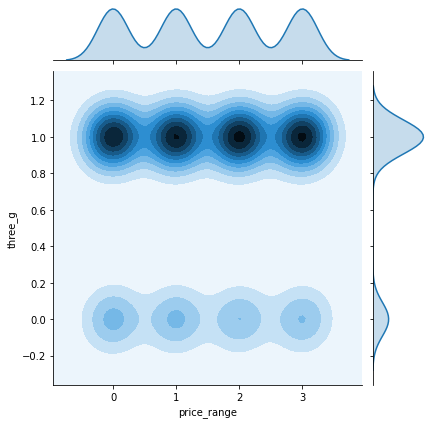

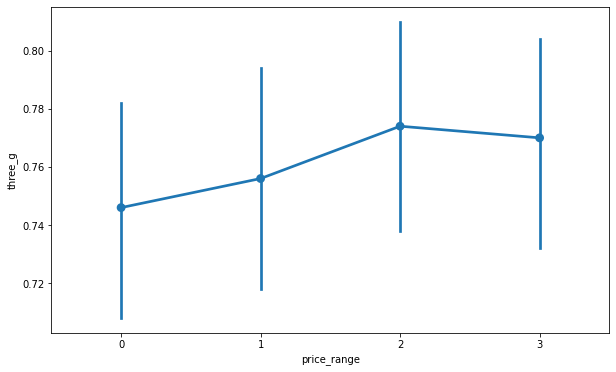

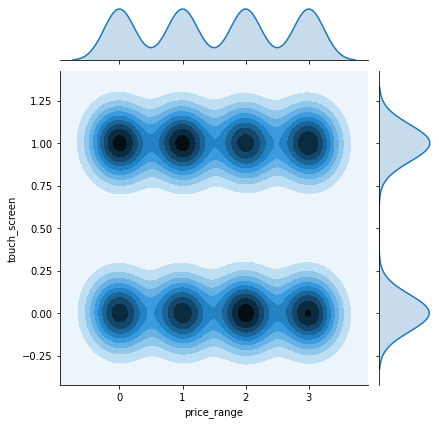

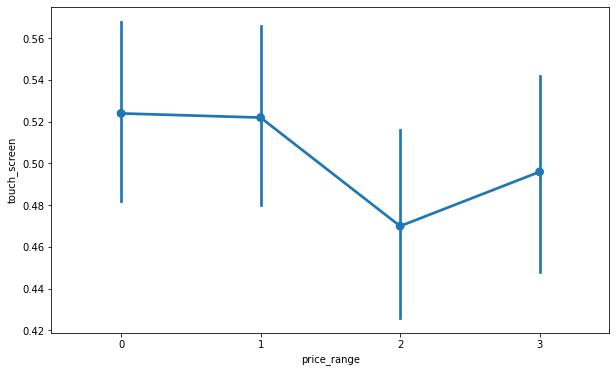

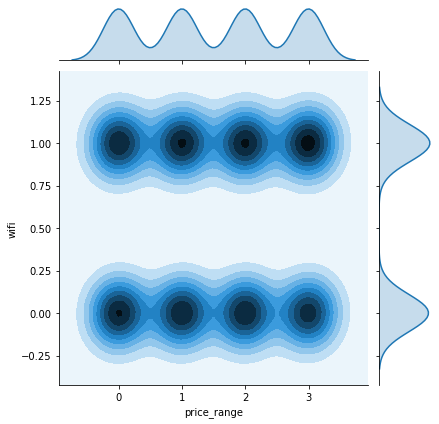

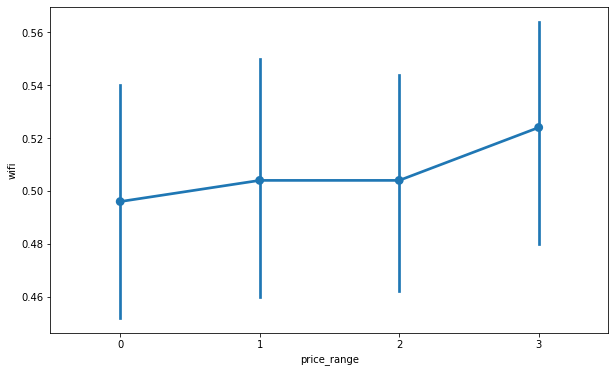

In [7]:
names = dataset.columns
for name in names:
    sns.jointplot(x="price_range", y=name, data=dataset, kind="kde")
    fig = plt.figure(figsize = (10,6))
    sns.pointplot(x="price_range", y = name, data=dataset)

Из графиков видно, что сильнее всего на цену вляиет объем оперативной памяти, но цена практически не зависит от скорости процессора наличия второй симкарты или разрешения фронтальной камеры. На всякий случай, проверим мои рассиждения на корреляционной карте.

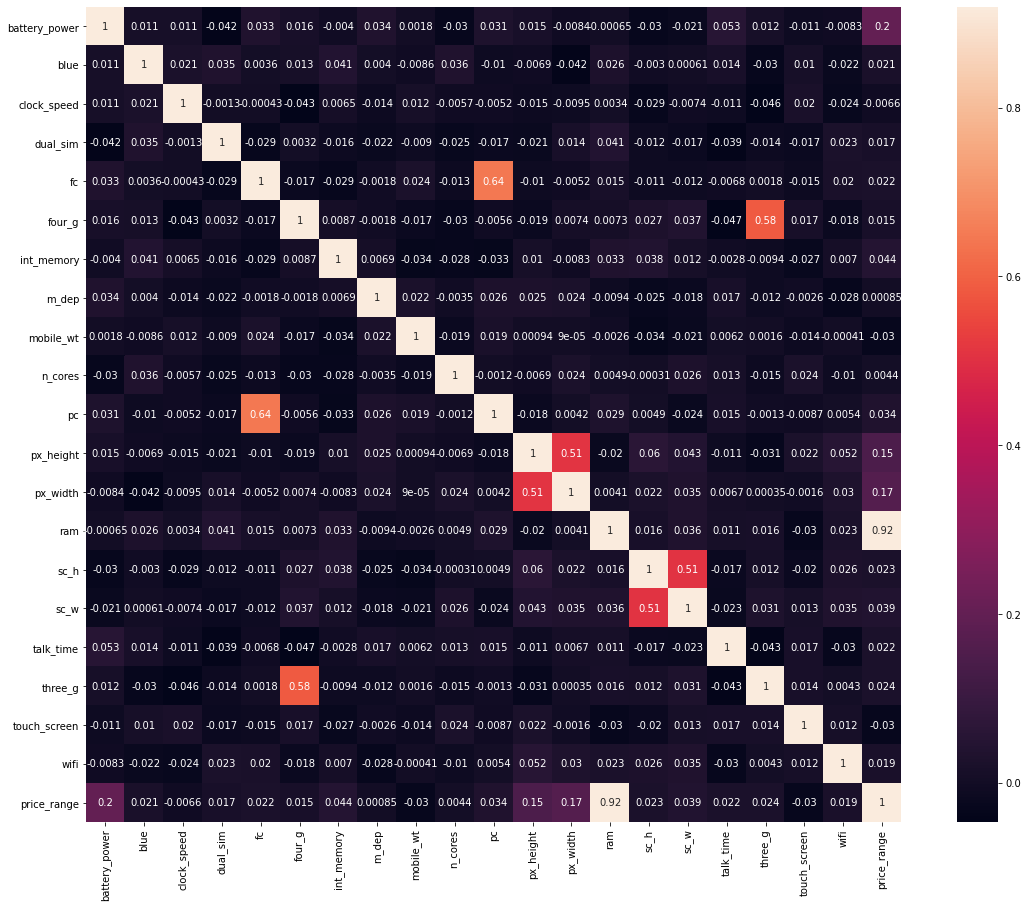

In [8]:
corrmat = dataset.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=0.92, annot=True, square=True, annot_kws={'size':10})

Получается, что на ценовую категорию восновном влияют: объем оперативной памяти, что хорошо было видно на граффике, объем аккумулятора и разрешение экрана.

## Разделяем данные для обучения и тестирования

In [9]:
x = dataset.drop('price_range',axis=1)
y = dataset['price_range']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

Давайте ещё сделаем датасет, который состоит только из признаков с высокой корреляцией и посмотрим, насколько сильно будет отличатьтся точность. И разрешение экрана я хочу добавить в один признак.

In [11]:
x1 = dict()
x1['ram'] = dataset['ram']
x1['battery_power'] = dataset['battery_power']
x1['px'] = dataset['px_height'] * dataset['px_width']
x1 = pd.DataFrame (x1)
y1 = dataset['price_range']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33, random_state=101)

## Строим модель линейной регрессии и обучаем её

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm1 = LinearRegression()

In [13]:
lm.fit(x_train,y_train)
lm.score(x_test,y_test)

0.9132801488185277

In [14]:
lm.fit(x_train1,y_train1)
lm.score(x_test1,y_test1)

0.9094642170778162

Наглядно видно, что признаки с низкой корреляцией хоть не силисльно, но всё же положительно влияют на точность, по этому избавляться от них не стоит.

## Теперь для повышения точностью воспользуемся KNN моделью

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

In [16]:
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9242424242424242